# Test: Optimizers performance

In this notebook we are testing how different optimizers such as SPSA, ADAM or COBYLA behave when doing state discrimination.

In [1]:
import sys 
sys.path.append('../../')

import itertools
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from qiskit.algorithms.optimizers import SPSA, COBYLA, ADAM
from qnn.quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks as nnd
from qnn.quantum_state import QuantumState 

plt.style.use('ggplot')

In [2]:
#Number of random states tested
N = 10

In [3]:
# Create random states
random_states = []
for i in range(N):
    ψ = QuantumState.random(1)
    ϕ = QuantumState.random(1)
    random_states.append([ψ,ϕ])

In [4]:
# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2  = [0], [pi]
th_v1, th_v2 = [0], [0]
fi_v1, fi_v2 = [0], [0]
lam_v1, lam_v2 = [0],  [0]

params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

In [5]:
# Initialize Discriminator
discriminator_list = [] 
for i in range(N):
    discriminator = nnd(random_states[i])
    discriminator_list.append(discriminator)
#Optimal solution
optimal_list = []
for i in range(N):
    optimal_list.append(nnd.helstrom_bound(random_states[i][0], random_states[i][1]))

In [7]:
# Calculate cost function using SPSA
# We use 75 iterations for SPSA, so he does 201 function evaluations: 50 for calibration, 
#2 each iteration and the final evaluation.
spsa_results = []
for i in range(N):
    results = discriminator_list[i].discriminate(SPSA(75), params)
    spsa_results.append(results[1])

In [10]:
# Calculate cost function using ADAM
#Adam evaluates 12 times each iteration plus the final one so we will use 17 iterations 
#to get a total of 205 evaluations.
adam_results = []
for i in range(N):
    results = discriminator_list[i].discriminate(ADAM(17), params)
    adam_results.append(results[1])

In [14]:
# Calculate cost function using COBLYA
# COBYLA does an evaluation each iteration
cobyla_results = []
for i in range(N):
    results = discriminator_list[i].discriminate(COBYLA(200), params)
    cobyla_results.append(results[1])

In [15]:
#Lets calculate the mean squared error of the results

In [16]:
def mean_squared_error(results, optimal_list, n):
    sol = 0
    for i in range(n):
        sol += (1/n) * (results[i] - optimal_list[i])**2
    return sol

In [17]:
#SPSA mean_squared_error
spsa_error = mean_squared_error(spsa_results,optimal_list, N)

In [18]:
#ADAM mean_squared_error
adam_error = mean_squared_error(adam_results,optimal_list, N)

In [19]:
#COBYLA mean_squared_error
cobyla_error = mean_squared_error(cobyla_results,optimal_list, N)

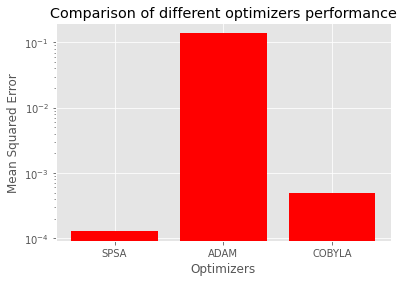

In [28]:
import matplotlib.pyplot as plt 

x=["SPSA","ADAM","COBYLA"]
y=[spsa_error,adam_error,cobyla_error]

fig = plt.bar(x,y, log = True, color = "red")
plt.xlabel("Optimizers")
plt.ylabel("Mean Squared Error")
plt.title("Comparison of different optimizers performance")
plt.savefig('optimizers_performance.png',dpi=400)

plt.show()